# 数据集属性字段分析

## 数值属性（25项）

DBNOs - 击倒敌人的数量

assists - 造成伤害但被队友击杀的敌方玩家的数目（助攻数）

boosts - 使用能量道具的数量

damageDealt - 对敌人造成的总伤害

headshotKills - 爆头击杀数量

heals - 使用治疗道具的数量

killPlace - 本场比赛的杀敌数排名

killPoints - 基于击杀数的外部Elo Rating

killStreaks - 连续击杀数（在短时间内）

kills - 杀敌数

longestKill - 最远杀敌距离（由于计算的是敌方玩家死亡而不是被击倒时与玩家的距离，因为在敌方玩家被击倒后玩家乘坐载具离开会导致最远杀敌距离变长，因此并不是特别准确）

matchDuration - 比赛时长

rankPoints - Elo排名，官方建议谨慎使用。

revives - 复活队友的次数

rideDistance - 使用载具移动的距离

roadKills - 使用载具击杀敌方玩家的数量

swimDistance - 游泳距离

teamKills - 杀死队友的数量

vehicleDestroys - 破坏载具的数量

walkDistance - 步行距离

weaponsAcquired - 捡起武器的数量

winPoints - 基于胜场的外部Elo Rating

numGroups - 该场比赛的小队数量

maxPlace - 本局的最差名次，可能与小队数量不同，因为会有名次并列。

winPlacePerc - 百分比排名（预测属性）1代表玩家排名第一，0代表玩家排名为倒数第一。百分比是按照本局的最差名次来计算的，而不是小队的数量。

## 标称属性（4项）

Id - 玩家ID

matchId - 比赛ID，训练集合测试集的比赛ID不会重合

matchType - 比赛（组队）类型，String类型，包括第一人称和第三人称的单排、双排、四排，其余模式来自自定义匹配。

groupId - 小队ID，同一组玩家组成的小队在不同比赛里的小队ID也不同


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os
import copy
import math
import scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("../input/train_V2.csv")

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
nominal_columns = ['Id','groupId', 'matchId', 'matchType']

In [5]:
train.head(5)

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

# 数据预处理

## 异常值处理

### 删除缺失值

In [7]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
idx = train['winPlacePerc'].isnull()
train[idx].head()

Id         groupId         matchId  assists  boosts  \
2744604  f70c74418bb064  12dfbede33f92b  224a123c53e008        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2744604          0.0      0              0      0          1  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
2744604           0.0          0           0.0          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
2744604           0.0                0          0           NaN  

[1 rows x 29 columns]

In [9]:
train = train.dropna(axis=0,how='any')

In [10]:
train.head(5)

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

### 删除有击杀但没有移动过的数据

In [11]:
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train["killsWithoutMoving"].head()

0    False
1    False
2    False
3    False
4    False
Name: killsWithoutMoving, dtype: bool

In [12]:
display(train[train['killsWithoutMoving'] == True])
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)

Id         groupId         matchId  assists  boosts  \
1824     b538d514ef2476  0eb2ce2f43f9d6  35e7d750e442e2        0       0   
6673     6d3a61da07b7cb  2d8119b1544f87  904cecf36217df        2       0   
11892    550398a8f33db7  c3fd0e2abab0af  db6f6d1f0d4904        2       0   
14631    58d690ee461e9d  ea5b6630b33d67  dbf34301df5e53        0       0   
15591    49b61fc963d632  0f5c5f19d9cc21  904cecf36217df        0       0   
...                 ...             ...             ...      ...     ...   
4440232  1f3a6d69d22c7e  60b2849191c539  ff9cd80c0d8fb7        0       0   
4440898  a089cb33a75968  eda174acfb503b  4c6b1a0e4cb346        0       0   
4440927  0634c650048997  5ccccee03a7f17  fc0bbecba8db99        2       2   
4441511  f5d385cadfab7e  a068f79011113c  fc0bbecba8db99        6       2   
4446682  b444f8c7af62b5  4e5b8eefdd669e  54277ef2ed69b7        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  roadKills  \
1824         593.000      0              0      3         18  ...          0   
6673         346.600      0              0      6         33  ...          0   
11892       1750.000      0              4      5          3  ...          0   
14631        157.800      0              0      0         69  ...          0   
15591        100.000      0              1      0         37  ...          0   
...              ...    ...            ...    ...        ...  ...        ...   
4440232        4.316      0              0      0         61  ...          0   
4440898       90.830      0              0      4         42  ...          0   
4440927      909.100      7              2     16         26  ...          0   
4441511      696.400      9              2      0         18  ...          0   
4446682       41.950      0              0      0         48  ...          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1824              0.0          0                0           0.0   
6673              0.0          0                0           0.0   
11892             0.0          0                0           0.0   
14631             0.0          0                0           0.0   
15591             0.0          0                0           0.0   
...               ...        ...              ...           ...   
4440232           0.0          0                0           0.0   
4440898           0.0          0                0           0.0   
4440927           0.0          0                0           0.0   
4441511           0.0          1                0           0.0   
4446682           0.0          0                0           0.0   

        weaponsAcquired  winPoints  winPlacePerc  totalDistance  \
1824                  8          0        0.8571            0.0   
6673                 22          0        0.6000            0.0   
11892                13          0        0.8947            0.0   
14631                 7       1500        0.0000            0.0   
15591                10          0        0.3000            0.0   
...                 ...        ...           ...            ...   
4440232               7       1500        0.8889            0.0   
4440898               8          0        0.0000            0.0   
4440927               7       1500        0.6000            0.0   
4441511              16       1500        0.9000            0.0   
4446682               4          0        0.9434            0.0   

         killsWithoutMoving  
1824                   True  
6673                   True  
11892                  True  
14631                  True  
15591                  True  
...                     ...  
4440232                True  
4440898                True  
4440927                True  
4441511                True  
4446682                True  

[1535 rows x 31 columns]

### 删除爆头率异常数据

In [7]:
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)
train["headshot_rate"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: headshot_rate, dtype: float64

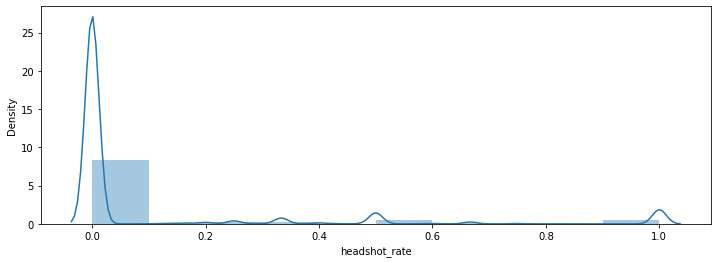

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10)
plt.show()

In [14]:
print(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].shape)
train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].head()

(24, 32)


Id         groupId         matchId  assists  boosts  \
281570  ab9d7168570927  add05ebde0214c  e016a873339c7b        2       3   
346124  044d18fc42fc75  fc1dbc2df6a887  628107d4c41084        3       5   
871244  e668a25f5488e3  5ba8feabfb2a23  f6e6581e03ba4f        0       4   
908815  566d8218b705aa  a9b056478d71b2  3a41552d553583        2       5   
963463  1bd6fd288df4f0  90584ffa22fe15  ba2de992ec7bb8        2       6   

        damageDealt  DBNOs  headshotKills  heals  killPlace  ...  \
281570       1212.0      8             10      0          1  ...   
346124       1620.0     13             11      3          1  ...   
871244       1365.0      9             13      0          1  ...   
908815       1535.0     10             10      3          1  ...   
963463       1355.0     12             10      2          1  ...   

        swimDistance  teamKills  vehicleDestroys  walkDistance  \
281570           0.0          0                0        2939.0   
346124           0.0          0                0        3422.0   
871244           0.0          0                0        2105.0   
908815           0.0          2                0        2761.0   
963463           0.0          0                0        2458.0   

        weaponsAcquired winPoints  winPlacePerc  totalDistance  \
281570                5         0        0.8462         2939.0   
346124                8      1560        1.0000         8142.0   
871244                5      1587        1.0000         2105.0   
908815                7      1519        0.9630         7948.0   
963463                4      1562        1.0000         3476.0   

        killsWithoutMoving  headshot_rate  
281570               False            1.0  
346124               False            1.0  
871244               False            1.0  
908815               False            1.0  
963463               False            1.0  

[5 rows x 32 columns]

In [8]:
train.drop(train[(train['headshot_rate'] == 1) & (train['kills'] > 9)].index, inplace=True)

## 标称属性处理

### 比赛类型one-hot处理

In [16]:
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [9]:
train = train.join(pd.get_dummies(train.matchType))
train.shape

(4445406, 48)

In [18]:
# 通过正则匹配查看具体内容
matchType_encoding = train.filter(regex='matchType').astype(str)
matchType_encoding.head()

matchType
0  squad-fpp
1  squad-fpp
2        duo
3  squad-fpp
4   solo-fpp

# 数据分析

## 数值属性分析

### 数值属性五数概括

In [19]:
train.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.445406e+06  4.445406e+06  4.445406e+06  4.445406e+06   4.445406e+06   
mean   2.333089e-01  1.107193e+00  1.305575e+02  6.576340e-01   2.263847e-01   
std    5.868948e-01  1.715920e+00  1.702703e+02  1.144092e+00   6.001951e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.418000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.445406e+06  4.445406e+06  4.445406e+06  4.445406e+06  4.445406e+06   
mean   1.369974e+00  4.760660e+01  5.050392e+02  9.231791e-01  5.435881e-01   
std    2.679727e+00  2.746341e+01  6.275352e+02  1.552822e+00  7.106278e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

       ...    normal-duo  normal-duo-fpp   normal-solo  normal-solo-fpp  \
count  ...  4.445406e+06    4.445406e+06  4.445406e+06     4.445406e+06   
mean   ...  4.341561e-05    1.217212e-03  6.321132e-05     3.385518e-04   
std    ...  6.588910e-03    3.486732e-02  7.950305e-03     1.839666e-02   
min    ...  0.000000e+00    0.000000e+00  0.000000e+00     0.000000e+00   
25%    ...  0.000000e+00    0.000000e+00  0.000000e+00     0.000000e+00   
50%    ...  0.000000e+00    0.000000e+00  0.000000e+00     0.000000e+00   
75%    ...  0.000000e+00    0.000000e+00  0.000000e+00     0.000000e+00   
max    ...  1.000000e+00    1.000000e+00  1.000000e+00     1.000000e+00   

       normal-squad  normal-squad-fpp          solo      solo-fpp  \
count  4.445406e+06      4.445406e+06  4.445406e+06  4.445406e+06   
mean   1.023529e-04      3.650510e-03  4.092315e-02  1.207111e-01   
std    1.011644e-02      6.030908e-02  1.981122e-01  3.257913e-01   
min    0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00      0.000000e+00  0.000000e+00  0.000000e+00   
max    1.000000e+00      1.000000e+00  1.000000e+00  1.000000e+00   

              squad     squad-fpp  
count  4.445406e+06  4.445406e+06  
mean   1.409352e-01  3.950492e-01  
std    3.479547e-01  4.888613e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  1.000000e+00  
max    1.000000e+00  1.000000e+00  

[8 rows x 43 columns]

###  探索性分析—击杀数据

#### 统计99%的玩家在比赛中的击杀数量。可以发现99%的玩家击杀了7个敌人及以下。

In [20]:
print("99% of people have {} kills or less". format (train['kills'].quantile(0.99)))

99% of people have 7.0 kills or less


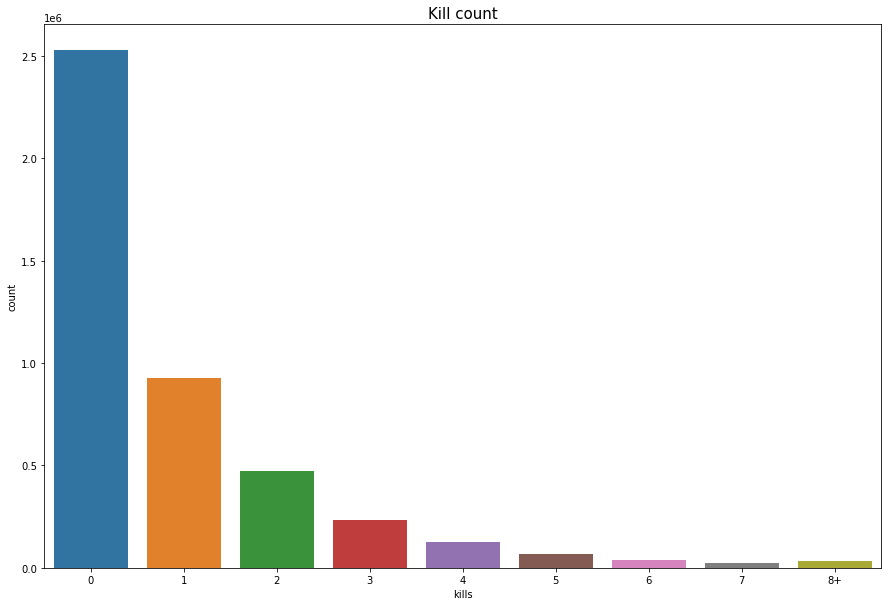

In [21]:
data=train.copy()
data.loc[data['kills']>data['kills'].quantile(0.99)]='8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill count",fontsize=15)
plt.show()

#### 统计没有击杀的玩家是否至少造成了伤害。可以发现大部分都没有造成伤害

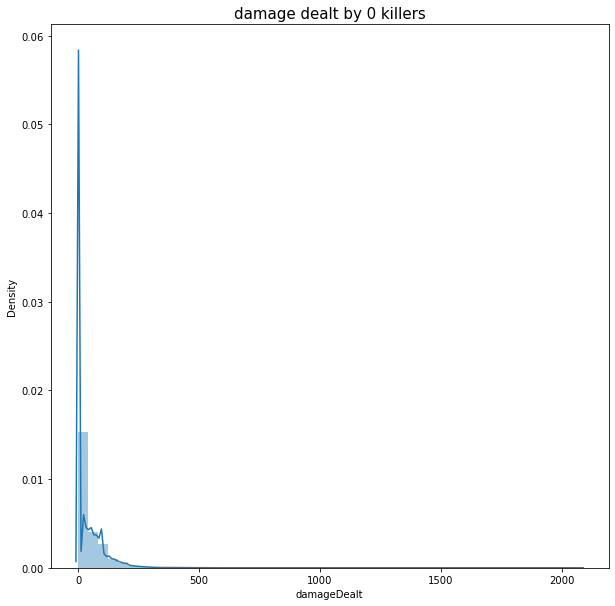

In [22]:
data=train.copy()
data=data[data['kills']==0]
plt.figure(figsize=(10,10))
plt.title("damage dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
plt.show()

#### 统计有多少玩家没有击杀但是赢得了胜利。可以发现有16666名玩家没有击杀但是赢得了胜利。

In [23]:
print("{} players have won without a single kill!". format(len(data[data['winPlacePerc']==1])))
data[data['winPlacePerc']==1].head()

16666 players have won without a single kill!


Id         groupId         matchId  assists  boosts  \
107   7970b4ea89e81e  abf9e2780b9f48  04832cfd74ff30        1       1   
118   953577684b828a  54ce33c41ef9ff  c5d412db6dbee4        2       6   
493   575f5ad18b60ac  9ed86c84df9fe7  728a56582842f8        1       3   
1225  c1bda1f071fbc4  55fe3f03feaa0e  f8927d87063fd3        1       3   
1289  e825b1eab36bcc  6ad3351953b514  44fa051734f50f        2       2   

      damageDealt  DBNOs  headshotKills  heals  killPlace  ...  normal-duo  \
107        58.360      0              0      2         38  ...           0   
118        76.110      0              0     12         45  ...           0   
493       275.900      0              0      2         44  ...           0   
1225        3.669      0              0      3         36  ...           0   
1289      126.800      0              0      1         44  ...           0   

      normal-duo-fpp  normal-solo  normal-solo-fpp  normal-squad  \
107                0            0                0             0   
118                0            0                0             0   
493                0            0                0             0   
1225               0            0                0             0   
1289               0            0                0             0   

     normal-squad-fpp  solo  solo-fpp  squad  squad-fpp  
107                 0     0         0      1          0  
118                 0     0         0      0          0  
493                 0     0         0      0          1  
1225                0     0         0      0          1  
1289                0     0         0      0          0  

[5 rows x 48 columns]

#### 统计有多少玩家没有击造成伤害但是赢得了胜利。可以发现有4770名玩家没有造成伤害但是赢得了胜利。

In [24]:
data1=train[train['damageDealt']==0].copy()
print("{} players have won without dealing damage!".format (len(data1[data1['winPlacePerc']==1])))
data1[data1['winPlacePerc']==1].head()

4770 players have won without dealing damage!


Id         groupId         matchId  assists  boosts  \
2931  2aed71cfd36e7f  c6e699a280f2a6  bbbed73da58547        0       2   
3114  f485c54e3c9652  43b9495099889d  1f78e2436506db        0       0   
3571  871a7cf56b5e1a  744c69678bd2ba  2e3b45023dcb07        0       4   
3702  3fc123559fc935  5cef1df7ee3551  01aead02bb8901        0       0   
5288  0017d4c0ec3125  a97f0da93e4768  f6d508a32b64c4        0       2   

      damageDealt  DBNOs  headshotKills  heals  killPlace  ...  normal-duo  \
2931          0.0      0              0      0         46  ...           0   
3114          0.0      0              0      0         38  ...           0   
3571          0.0      0              0      5         40  ...           0   
3702          0.0      0              0      0          1  ...           0   
5288          0.0      0              0     10         44  ...           0   

      normal-duo-fpp  normal-solo  normal-solo-fpp  normal-squad  \
2931               0            0                0             0   
3114               0            0                0             0   
3571               0            0                0             0   
3702               0            0                0             0   
5288               0            0                0             0   

     normal-squad-fpp  solo  solo-fpp  squad  squad-fpp  
2931                0     0         0      1          0  
3114                0     0         0      0          1  
3571                0     0         0      0          1  
3702                0     1         0      0          0  
5288                0     0         0      0          1  

[5 rows x 48 columns]

#### 可视化击杀数和百分比排名之间的关系。可以发现击杀数和百分比排名之间呈现正相关性。

#####  散点图

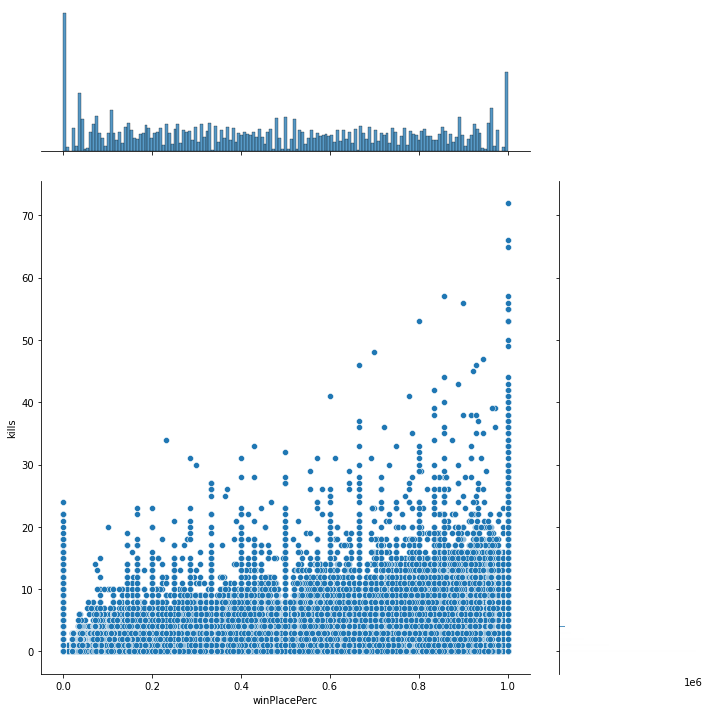

In [25]:
sns.jointplot(x="winPlacePerc",y="kills",data=train,height=10,ratio=3)
plt.show()

#####  箱线图

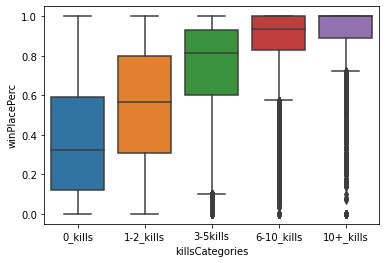

In [26]:
kills=train.copy()
kills['killsCategories']=pd.cut(kills['kills'],
                                [-1,0,2,5,10,60],
                                labels=['0_kills','1-2_kills','3-5kills','6-10_kills','10+_kills'])
sns.boxplot(x="killsCategories", y="winPlacePerc",data=kills)
plt.show()

###  探索性分析—步行数据

#### 统计99%玩家的步行距离。可以发现99%的玩家步行距离少于等于4963米。

In [27]:
print("99% of people have walked {}m or less.". format(train['walkDistance'].quantile(0.99)))

99% of people have walked 4396.0m or less.


#### 可视化步行数据。

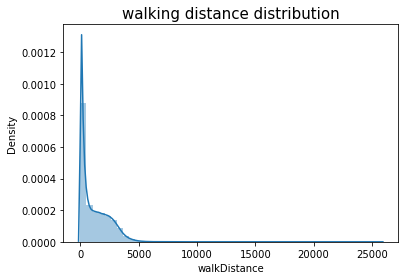

In [28]:
data=train.copy()
plt.title("walking distance distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

#### 统计有多少玩家死亡前没有任何移动。可以发现有98067名玩家死亡前没有任何移动。

In [29]:
print("{} players walked 0 meters.".format(len(data[data['walkDistance']==0])))
print("this means that they die before even taking a step.")

98067 players walked 0 meters.
this means that they die before even taking a step.


#### 可视化步行距离和百分比排名之间的关系。可以发现步行数据与百分比排名具有非常强的相关性。

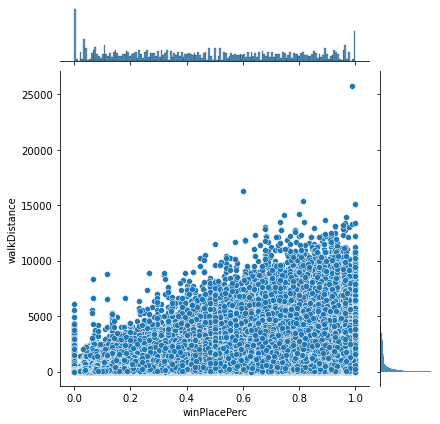

In [30]:
sns.jointplot(x="winPlacePerc",y="walkDistance",data=train)
plt.show()

###  探索性分析—载具数据

#### 统计99%玩家的载具距离。可以发现99%的玩家搭乘载具行进的距离少于等于6966米。

In [31]:
print("99% of people have drived {}m. or less.".format(train['rideDistance'].quantile(0.99)))

99% of people have drived 6966.0m. or less.


#### 可视化载具移动距离

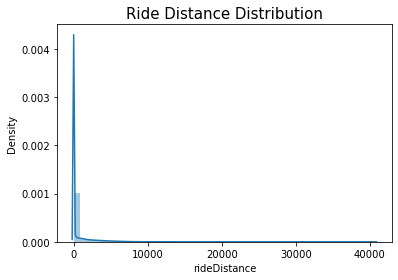

In [32]:
data=train.copy()
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

#### 可视化破坏载具数量和百分比排名之间的关系。可以发现载具破坏数据与百分比排名呈现略微的正相关关系。

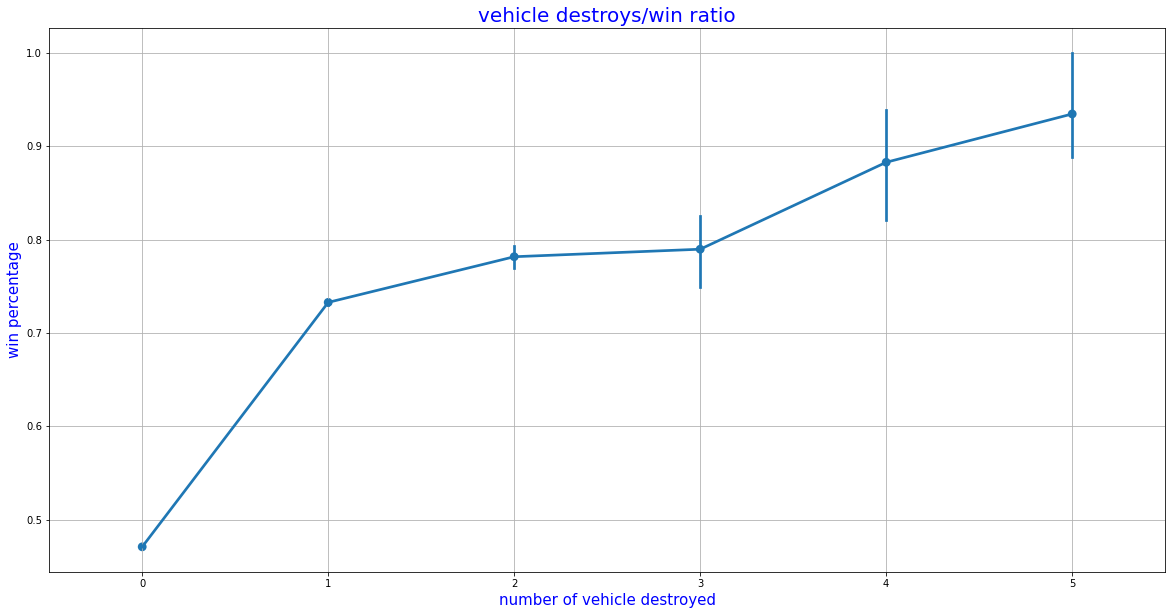

In [33]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data)
plt.xlabel('number of vehicle destroyed',fontsize=15,color='blue')
plt.ylabel('win percentage',fontsize=15,color='blue')
plt.title('vehicle destroys/win ratio',fontsize=20,color='blue')
plt.grid()
plt.show()

###  探索性分析—游泳数据

#### 统计99%玩家的游泳距离。可以发现99%的玩家的游泳距离少于等于123米。

In [34]:
print("99% of people have swimmed {}m or less.".format(train['swimDistance'].quantile(0.99)))

99% of people have swimmed 123.0m or less.


#### 可视化游泳数据

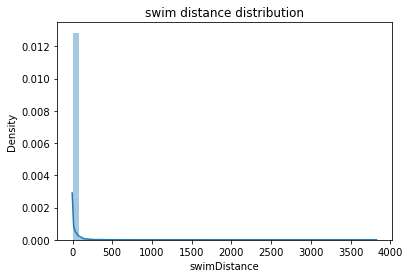

In [35]:
data=train.copy()
plt.figure
plt.title("swim distance distribution")
sns.distplot(data['swimDistance'])
plt.show()

#### 可视化游泳距离与百分比排名之间的关系。由于PUBG存在沙漠地图，我们甚至可以推断出本场比赛的具体地图。并且游泳距离和百分比排名也有轻微的正相关性。

##### 箱线图

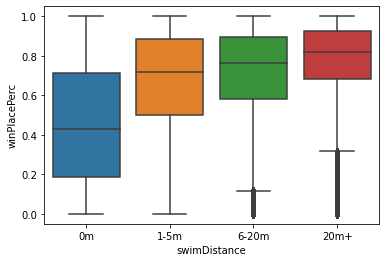

In [36]:
swim=train.copy()
swim['swimDistance']=pd.cut(swim['swimDistance'],
                             [-1,0,5,20,5286],
                             labels=['0m','1-5m','6-20m','20m+'])
plt.figure
sns.boxplot(x="swimDistance",y="winPlacePerc",data=swim)
plt.show()

###  探索性分析—治疗和能量数据

#### 统计99%玩家的治疗和能量道具数据。可以发现99%的玩家使用治疗道具的数量少于等于12，使用能量道具的数量少于等于7。

##### 治疗道具数量

In [37]:
print("99% of people use {} or less heals.".format(train['heals'].quantile(0.99)))

99% of people use 12.0 or less heals.


##### 能量道具数量（Boosting）

In [38]:
print("99% of people use {} or less boosts.".format(train['boosts'].quantile(0.99)))

99% of people use 7.0 or less boosts.


#### 可视化使用治疗和能量道具数量和百分比排名之间的关系。可以发现治疗和能量道具的使用都与百分比排名具有正相关的关系，能量道具的使用与百分比排名的正相关关系更加明显。

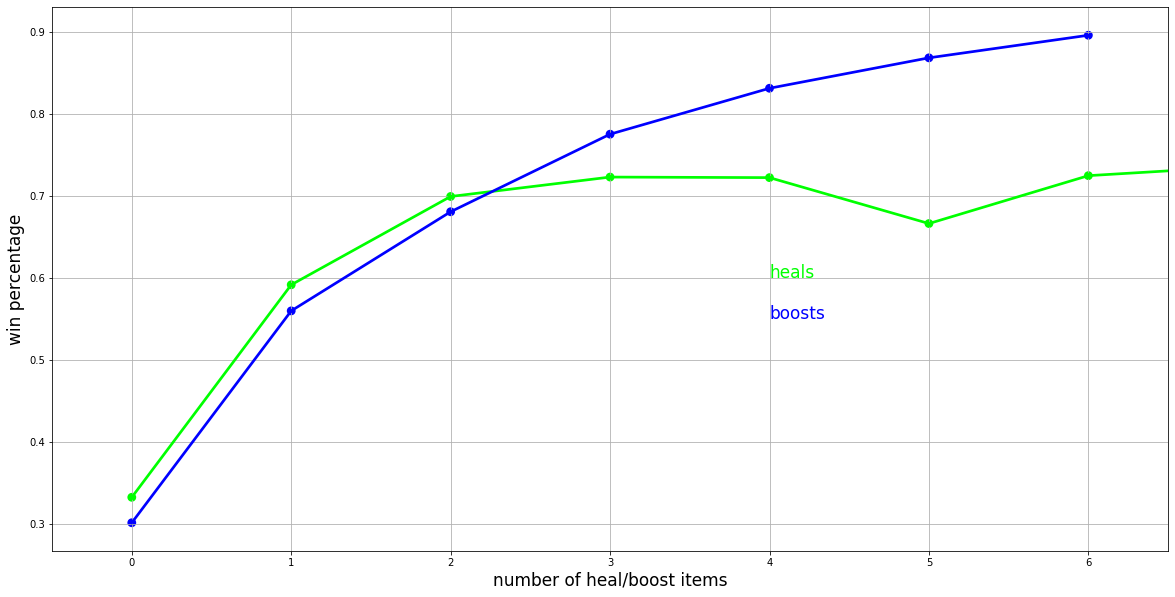

In [23]:
data = train.copy()
data=data[data['heals']<data['heals'].quantile(0.99)]
data=data[data['boosts']<data['boosts'].quantile(0.99)]
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'heals',color='lime',fontsize=17)
plt.text(4,0.55,'boosts',color='blue',fontsize=17)
plt.xlabel('number of heal/boost items',fontsize=17)
plt.ylabel('win percentage',fontsize=17)
plt.grid()
plt.show()

### 探索性分析—参赛数据

#### 统计每场比赛参赛人数的场次。有一些少于75名玩家的比赛没有显示在这里。可以发现大多数比赛几乎都是爆满的，有近100名玩家。

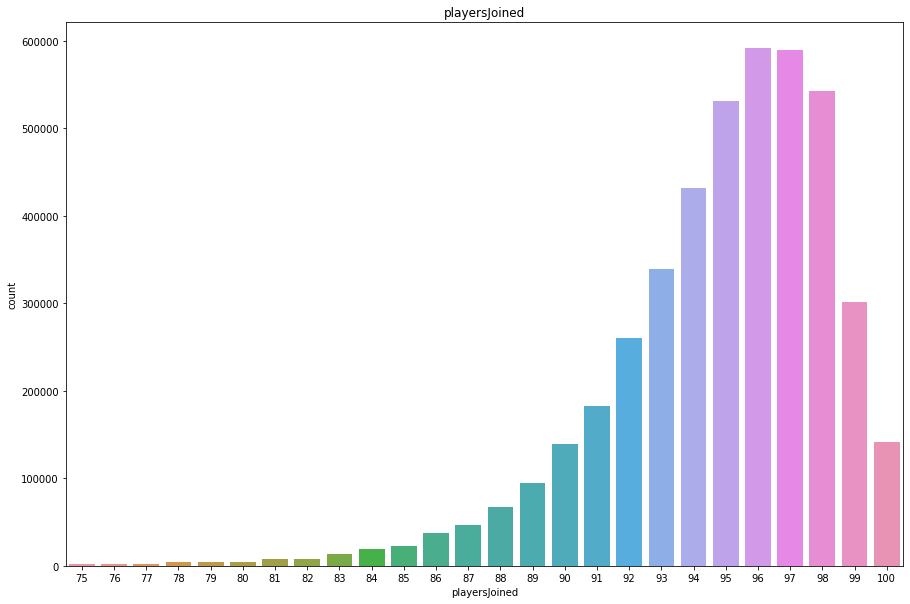

In [15]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
plt.figure(figsize=(15,10))
sns.countplot(train[train['playersJoined']>=75]['playersJoined'])
plt.title('playersJoined')
plt.show()

### 探索性分析—爆头击杀数据

#### 首先查看整个数据集并创建一个新特性'headshot_rate'。可以发现大多数玩家在0到10%的区域得分。然而有一些异常数据显示有超过9杀拥有100%的爆头率。 

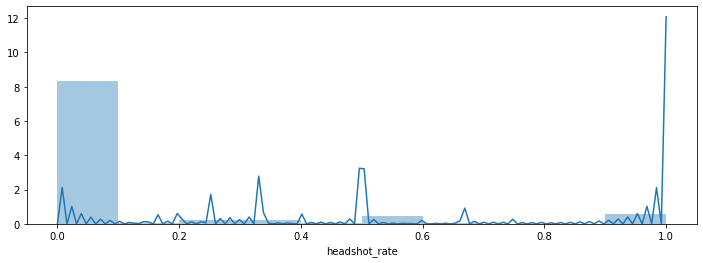

In [16]:
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)
plt.figure(figsize=(12,4))
sns.distplot(train['headshot_rate'], bins=10)
plt.show()

#### 统计击杀距离的分布。可以发现大多数击杀都是在100米或更近的距离内完成的。也有一些例外，玩家能在1公里以上的地方击杀对手

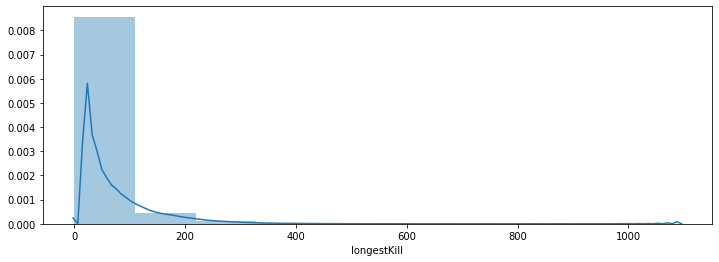

In [24]:
plt.figure(figsize=(12,4))
sns.distplot(train['longestKill'], bins=10)
plt.show()

### 探索性分析—武器数据

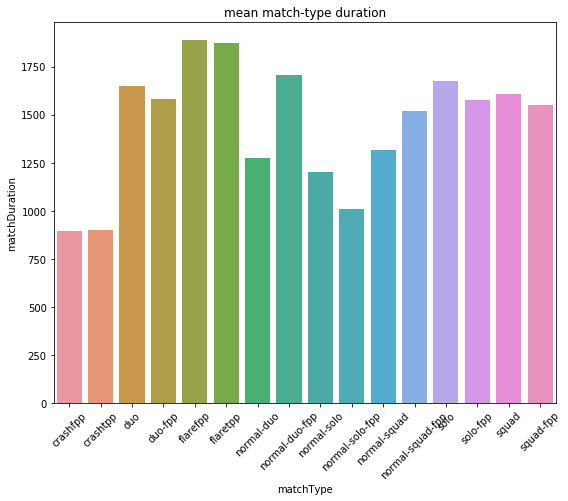

In [18]:
plt.figure(figsize=(9,7))
match_dur=train.groupby('matchType')['matchDuration'].agg('mean')
sns.barplot(x=match_dur.index,y=match_dur)
plt.gca().set_xticklabels(match_dur.index,rotation='45')
plt.gca().set_title('mean match-type duration')
plt.show()

#### 统计玩家武器数量与获胜几率的关系。首先将获得的武器数量分类，以便正确地观察。可以发现拥有6-25件的武器会让玩家的获胜几率更大。这个数字比较合理，因为超过100就有可能是作弊。  

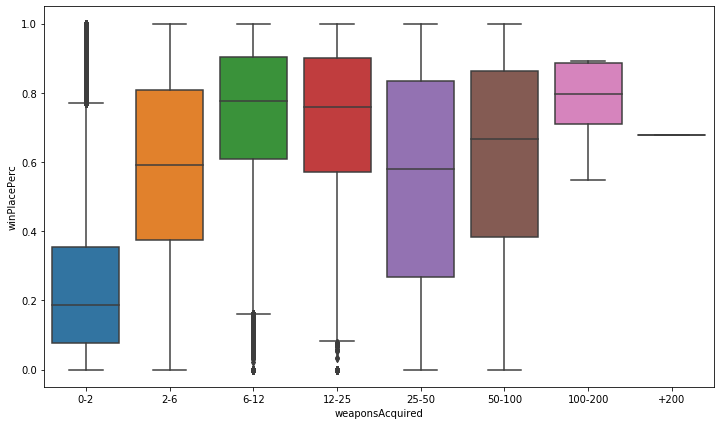

In [19]:
weapons_num=pd.cut(train['weaponsAcquired'],[0,2,6,12,25,50,100,200,300],
                   labels=['0-2','2-6','6-12','12-25','25-50','50-100','100-200','+200'])
plt.figure(figsize=(12,7))
sns.boxplot(x=weapons_num,y='winPlacePerc',data=train)
plt.show()

#### 统计击杀数量和对敌人造成的总伤害之间的关系。可以发现这两个属性呈现正相关的关系。

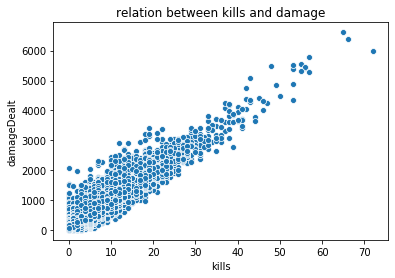

In [25]:
sns.scatterplot(train.kills,train.damageDealt)
plt.title('relation between kills and damage')
plt.show()

#### 统计九个属性与比赛百分比排名的关系

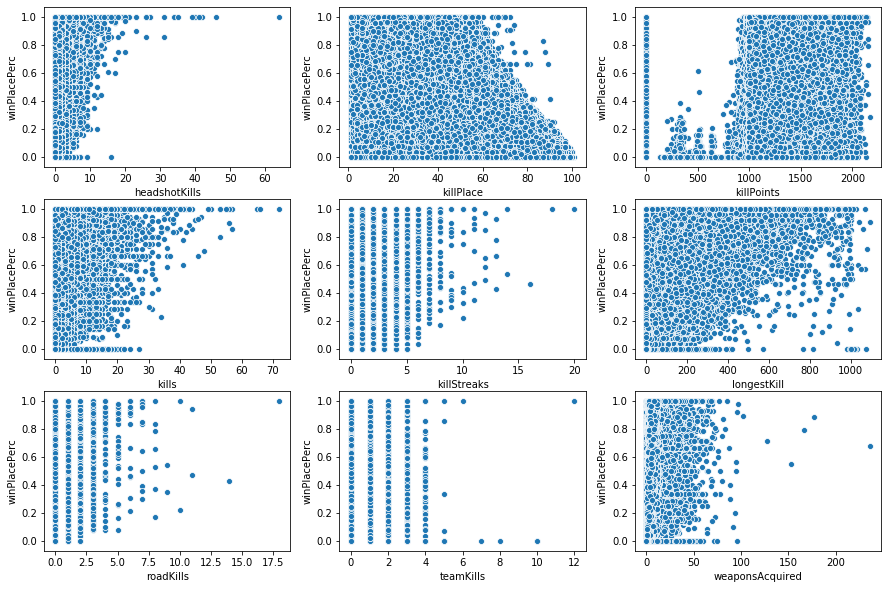

In [21]:
kills = train[['headshotKills','killPlace','killPoints','kills','killStreaks','longestKill','roadKills','teamKills'
               ,'weaponsAcquired','winPlacePerc']]
kills_features = ['headshotKills','killPlace','killPoints','kills','killStreaks','longestKill','roadKills'
                  ,'teamKills','weaponsAcquired']
def scatter (feature_name):
        sns.scatterplot(x=feature_name,y='winPlacePerc',data=kills)

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
scatter(kills_features[0])
plt.subplot(3,3,2)
scatter(kills_features[1])
plt.subplot(3,3,3)
scatter(kills_features[2])
plt.subplot(3,3,4)
scatter(kills_features[3])
plt.subplot(3,3,5)
scatter(kills_features[4])
plt.subplot(3,3,6)
scatter(kills_features[5])
plt.subplot(3,3,7)
scatter(kills_features[6])
plt.subplot(3,3,8)
scatter(kills_features[7])
plt.subplot(3,3,9)
scatter(kills_features[8])
plt.show()

## 标称属性分析

### 组队类型分析

#### 数据中单排 双排 四排所占比例

In [40]:
datamt = train.copy()
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
datamt['matchTypeSimple'] = datamt['matchType'].apply(mapper)
datamt.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  normal-duo-fpp  \
0         0.00      0              0      0         60  ...               0   
1        91.47      0              0      0         57  ...               0   
2        68.00      0              0      0         47  ...               0   
3        32.90      0              0      0         75  ...               0   
4       100.00      0              0      0         45  ...               0   

   normal-solo  normal-solo-fpp  normal-squad  normal-squad-fpp solo  \
0            0                0             0                 0    0   
1            0                0             0                 0    0   
2            0                0             0                 0    0   
3            0                0             0                 0    0   
4            0                0             0                 0    0   

   solo-fpp  squad  squad-fpp  matchTypeSimple  
0         0      0          1            squad  
1         0      0          1            squad  
2         0      0          0              duo  
3         0      0          1            squad  
4         1      0          0             solo  

[5 rows x 49 columns]

In [41]:
s=datamt[datamt['matchTypeSimple'] == 'solo']
d=datamt[datamt['matchTypeSimple'] == 'duo']
sq=datamt[datamt['matchTypeSimple'] == 'squad']

In [42]:
print("there are {} ({}%) solo games.".format(len(s),100*len(s)/len(train)))
print("there are {} ({}%) duo games.".format(len(d),100*len(d)/len(train)))
print("there are {} ({}%) squad gmaes.". format(len(sq),100*len(sq)/len(train)))

there are 720316 (16.203604350198834%) solo games.
there are 1322516 (29.750173549952468%) duo games.
there are 2402574 (54.0462220998487%) squad gmaes.


####  可视化单排、双排、四排的击杀数与排名的关系

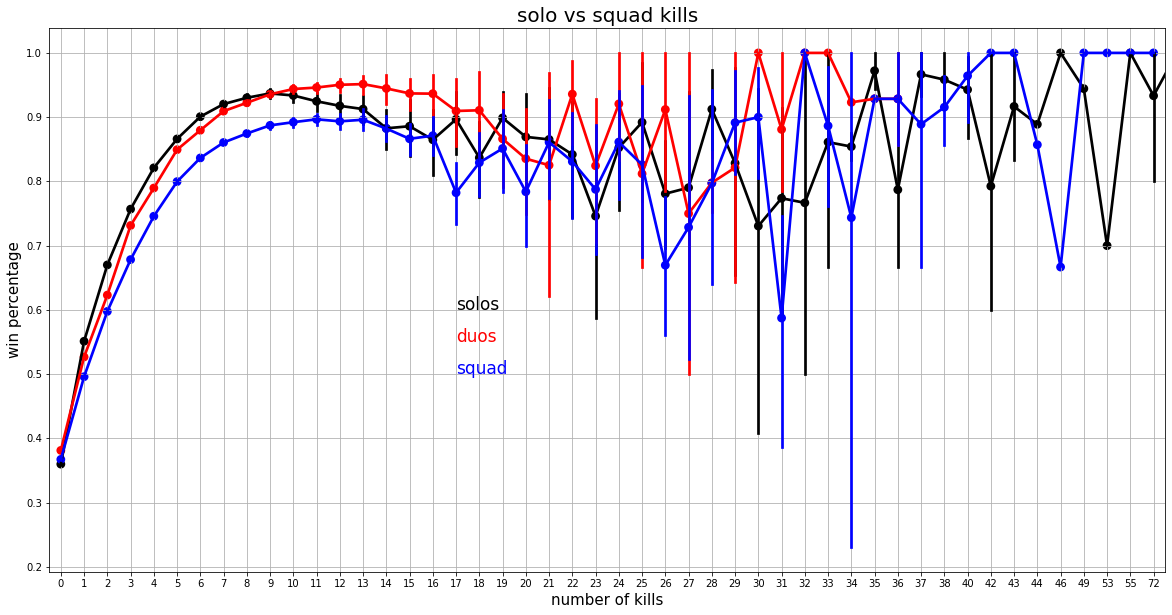

In [43]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot('kills',y='winPlacePerc',data=s, color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=d,color='red',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=sq,color='blue',alpha=0.8)
plt.text(17,0.6,'solos',color='black',fontsize=17)
plt.text(17,0.55,'duos',color='red',fontsize=17)
plt.text(17,0.5,'squad',color='blue',fontsize=17)
plt.xlabel('number of kills',fontsize=15)
plt.ylabel('win percentage',fontsize=15)
plt.title('solo vs squad kills', fontsize=20)
plt.grid()
plt.show()

#### 可视化单双排、四排的击倒数、助攻数、复活数与排名的关系

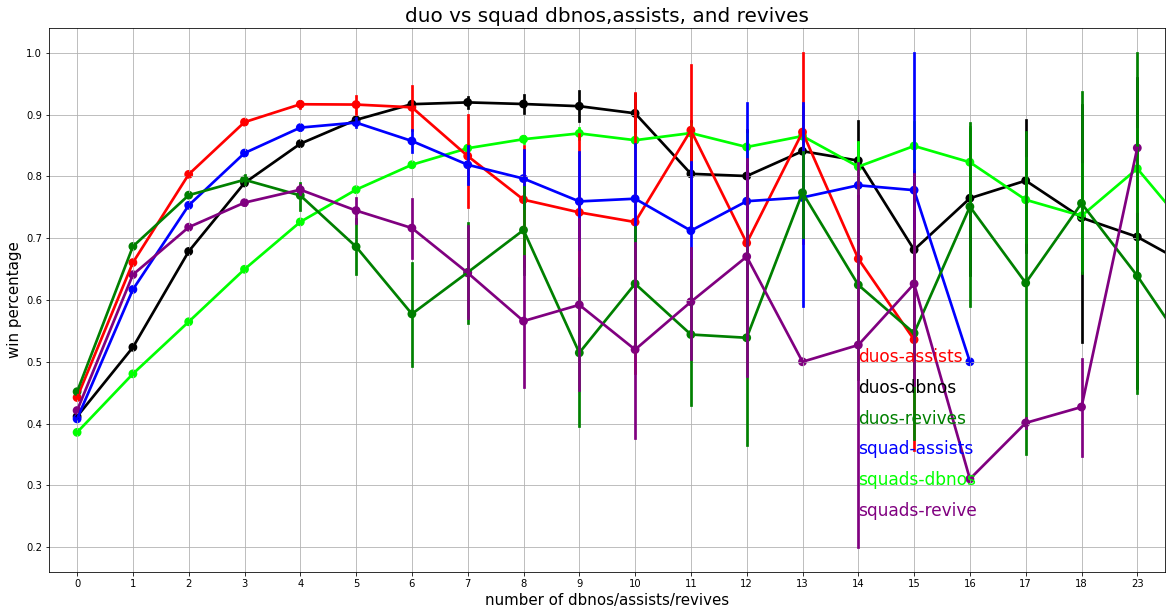

In [44]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x='DBNOs', y='winPlacePerc',data=d,color='black',alpha=0.8)
sns.pointplot(x='DBNOs', y='winPlacePerc',data=sq,color='lime',alpha=0.8)
sns.pointplot(x='assists', y='winPlacePerc',data=d,color='red',alpha=0.8)
sns.pointplot(x='assists', y='winPlacePerc',data=sq,color='blue',alpha=0.8)
sns.pointplot(x='revives', y='winPlacePerc',data=d,color='green',alpha=0.8)
sns.pointplot(x='revives', y='winPlacePerc',data=sq,color='purple',alpha=0.8)
plt.text(14,0.5,'duos-assists',color='red',fontsize=17)
plt.text(14,0.45,'duos-dbnos',color='black',fontsize=17)
plt.text(14,0.4,'duos-revives',color='green',fontsize=17)
plt.text(14,0.35,'squad-assists',color='blue',fontsize=17)
plt.text(14,0.3,'squads-dbnos',color='lime',fontsize=17)
plt.text(14,0.25,'squads-revive',color='purple',fontsize=17)
plt.xlabel('number of dbnos/assists/revives',fontsize=15)
plt.ylabel('win percentage',fontsize=15)
plt.title('duo vs squad dbnos,assists, and revives',fontsize=20)
plt.grid()
plt.show()

## 属性关联性分析

### 可视化变量间的皮尔森相关性矩阵

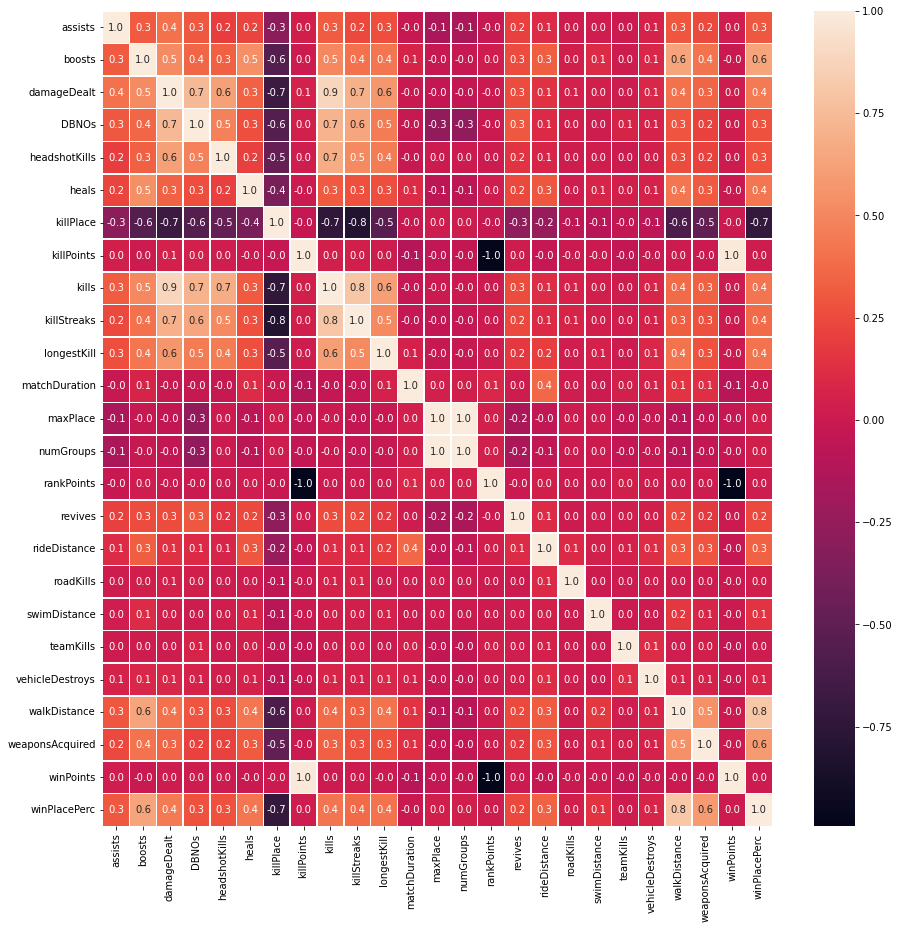

In [45]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(train.iloc[:, :29].corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

### 进一步可视化与百分比排名相关度最高的前5个属性

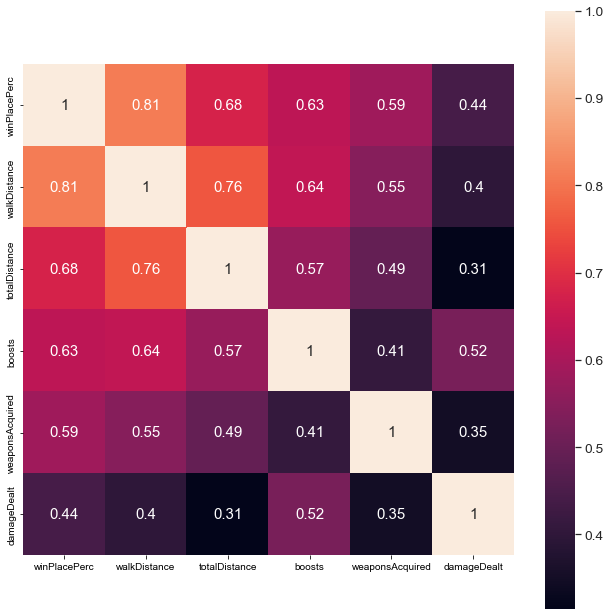

In [46]:
k=6
f,ax=plt.subplots(figsize=(11,11))
cols=train.corr().nlargest(k,'winPlacePerc')['winPlacePerc'].index
sns.set(font_scale=1.25)
hm=sns.heatmap(train[cols].corr(),cbar=True,annot=True,square=True)
plt.show()

### 绘制这些变量之间的散点图 可视化两两关系

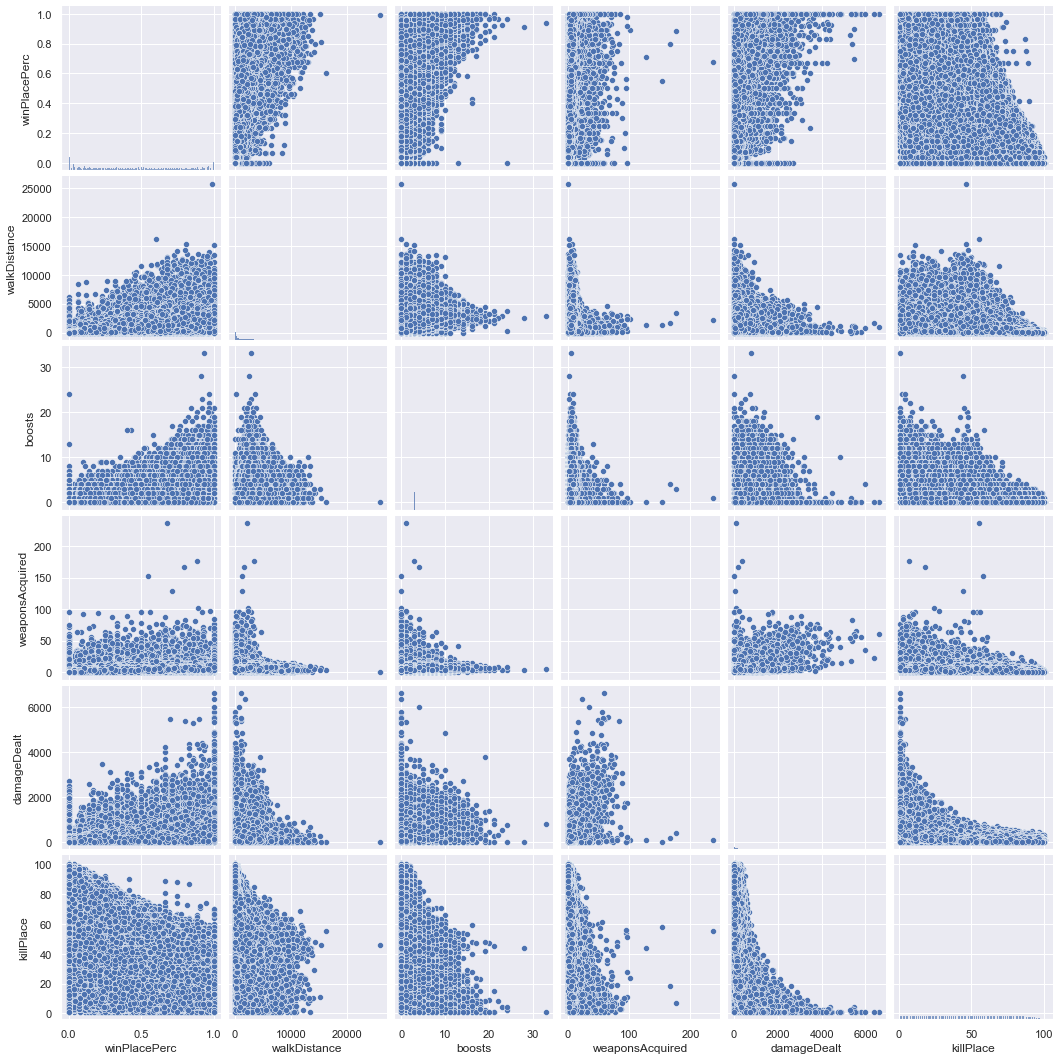

In [47]:
sns.set()
cols=['winPlacePerc','walkDistance','boosts','weaponsAcquired','damageDealt','killPlace']
sns.pairplot(train[cols],size=2.5)
plt.show()

there are 3 game modes in the game . one can play solo , or with a friend ,duo, or with 3 other friends , squad, 100 players join the same server , so in the case of duos the max teams are 50 and in case of squads the max teams are 25. there are 709111 (15.945950564946978%) solo games,there are 3295326 (74.10279278051597%) duo games,there are 442529 (15.945950564946978%) squad gmaes in the data.solos and duoes behave the same, but when playing squads kills don't matter that much. the attribute DBNOs means enemy players knocked . A "Knock" can happen only in duos or squads. the attribute assist can also happen only in duos pr squads. it generally means that the players had an involvement in a kill . the attribute revive also happens in duos or squads Win Place perc A very high correlation between this 5 features . boosting , weapon accuaring , damage dealt , walk distance , kill place .I have created some more features watching the scenarios of the game which has high correlation with win place perc that are "kills norm" ," damage dealt ","healsandboosts" , "totalDistanc" ,"boostsper walk distance" , "heals per walk distance" , " kills per walk distance" , "solos" ,"duos" ,"squad" & added them with the table .

Future works - this data analysis model project can be used to develop the game and making the game more interesting . It can also be used to

## 聚类分析

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

创建用于聚类分析的数据 `cdata`。剔除非数值型的列 `Id`, `groupId`, `matchId`。`matchType` 已经转为 One-Hot，因此也剔除原始列。

In [10]:
cdrop = ['Id','groupId','matchId','matchType','winPlacePerc']
cdata = train.loc[0:math.floor(train.shape[0]*0.001), [x for x in train.columns if x not in cdrop]]
tdata = train.loc[0:math.floor(train.shape[0]*0.001), ['winPlacePerc']]

先尝试进行 PCA 主成分分析。尝试选用 2 个主成分。

In [11]:
pca2 = PCA(n_components=2)
pca2.fit(cdata)
print(sum(pca2.explained_variance_ratio_))
P2 = pca2.transform(cdata)

0.8755513362711799


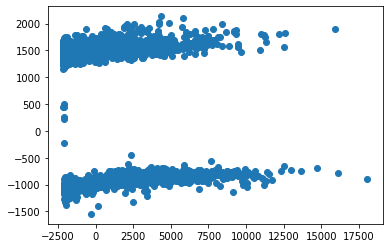

In [12]:
plt.scatter(P2[:,0],P2[:,1])
plt.show()

可以观察到数据可明显产生 2 个集群。主成分分析向我们揭示了集群的数量。

再尝试 3 个主成分。

In [13]:
pca3 = PCA(n_components=3)
pca3.fit(cdata)
print(sum(pca3.explained_variance_ratio_))
P3 = pca3.transform(cdata)

0.9900306574984697


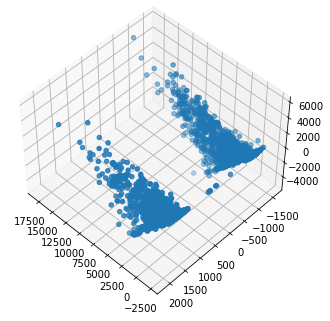

In [14]:
fig_p3 = plt.figure()
ax = Axes3D(fig_p3, elev=48, azim=134)
ax.scatter(P3[:,0],P3[:,1],P3[:,2])
fig_p3.show()

仍然是大致 2 个集群，数量没有增加。

如果直接对主成分分析的结果进行聚类，效果不太理想。

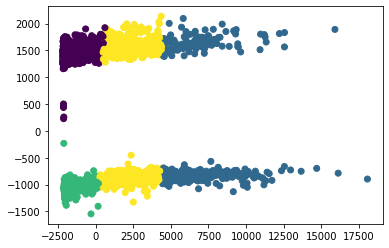

In [15]:
kms4 = KMeans(n_clusters=4).fit(P2)
plt.scatter(P2[:,0],P2[:,1],c=kms4.labels_)
plt.show()

转而尝试直接对原始数据进行聚类。

In [16]:
kmso = KMeans(n_clusters=4).fit(cdata)

产生的聚类中心如下。

In [17]:
pd.DataFrame(kmso.cluster_centers_,columns=cdata.columns)

assists    boosts  damageDealt     DBNOs  headshotKills     heals  \
0  0.475703  2.933504   210.826051  1.035806       0.383632  3.759591   
1  0.132212  0.317909    82.792632  0.404447       0.109976  0.494591   
2  0.141571  0.387889    90.589185  0.490180       0.133388  0.612111   
3  0.420377  2.521404   216.495277  1.060788       0.462329  2.772260   

   killPlace    killPoints     kills  killStreaks  ...  roadKills  \
0  29.434783  4.074322e+02  1.485934     0.780051  ...   0.017903   
1  58.664063  3.467449e-12  0.518029     0.384014  ...   0.001202   
2  57.689853  1.240018e+03  0.567103     0.405074  ...   0.001637   
3  27.952911  4.687389e+02  1.750856     0.848459  ...   0.003425   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0      9.920176   0.061381         0.061381   2215.162916         5.575448   
1      1.552684   0.019832         0.001202    425.272752         2.706130   
2      1.211182   0.013912         0.000818    458.035629         2.756956   
3      9.770957   0.035959         0.018836   2510.434846         5.181507   

      winPoints  totalDistance  killsWithoutMoving  headshot_rate  
0  4.908031e+02    7115.448820                 0.0       0.150746  
1  2.501110e-12     460.462866                 0.0       0.073093  
2  1.496191e+03     506.791020                 0.0       0.081388  
3  5.659118e+02    3191.242111                 0.0       0.159862  

[4 rows x 27 columns]

从前述关联性分析可知，`killPoints` 与排名之间的关系较低。尝试可视化分析，不同聚类用不同颜色标示。

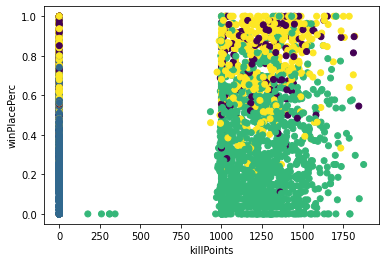

In [18]:
plt.scatter(cdata['killPoints'],tdata['winPlacePerc'],c=kmso.labels_)
plt.xlabel('killPoints')
plt.ylabel('winPlacePerc')
plt.show()

同样从前述关联性分析可知，`walkDistance` 与排名之间的关系较强。我们也可视化标示一下。

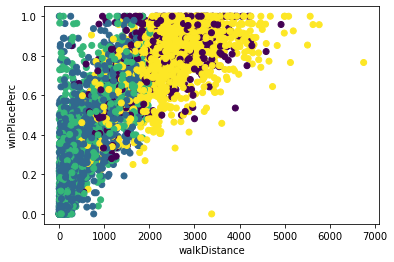

In [19]:
plt.scatter(cdata['walkDistance'],tdata['winPlacePerc'],c=kmso.labels_)
plt.xlabel('walkDistance')
plt.ylabel('winPlacePerc')
plt.show()

我们再对具有较强相关性的几个变量进行标示。

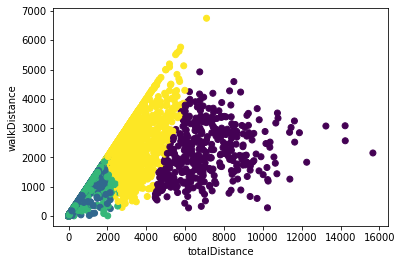

In [20]:
plt.scatter(cdata['totalDistance'],cdata['walkDistance'],c=kmso.labels_)
plt.xlabel('totalDistance')
plt.ylabel('walkDistance')
plt.show()

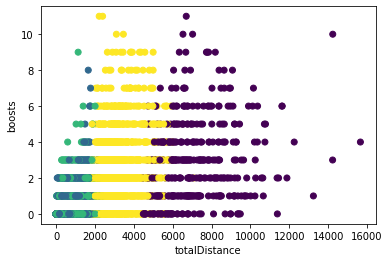

In [21]:
plt.scatter(cdata['totalDistance'],cdata['boosts'],c=kmso.labels_)
plt.xlabel('totalDistance')
plt.ylabel('boosts')
plt.show()

在创建用于聚类分析的数据时，我们删除了排名列。为了检验聚类效果的好坏，来看一看各个类的排名情况。

首先，以下图标示各个颜色的顺序号。从左往右，分别为第一至第四类。

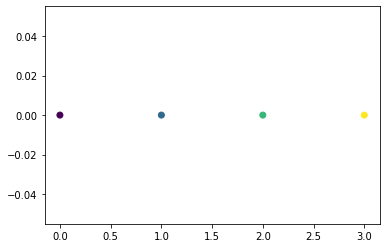

In [83]:
plt.scatter([0,1,2,3],[0,0,0,0],c=[0,1,2,3])
plt.show()

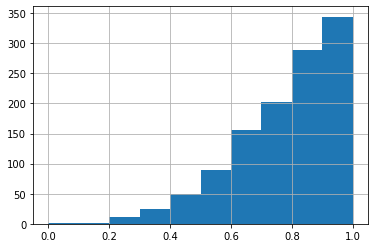

In [84]:
tdata[kmso.labels_==0]['winPlacePerc'].hist()
plt.show()

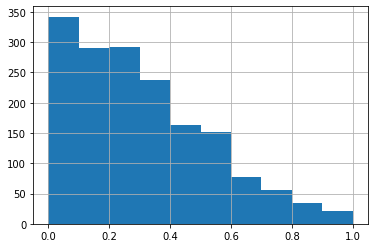

In [85]:
tdata[kmso.labels_==1]['winPlacePerc'].hist()
plt.show()

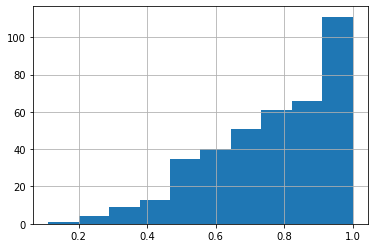

In [86]:
tdata[kmso.labels_==2]['winPlacePerc'].hist()
plt.show()

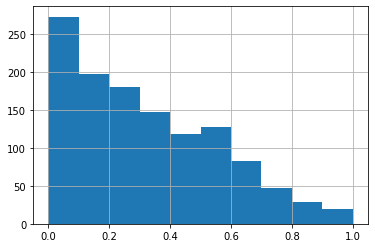

In [87]:
tdata[kmso.labels_==3]['winPlacePerc'].hist()
plt.show()

可以发现，聚类得到的 4 个类里，有两个类以低排名为主，有两个类以高排名为主，具有区分性，说明聚类的效果不错。

我们也可以得出这样的结论：在步行移动、载具移动、游泳移动的总和中，步行移动的数值及占比，均符合前面 `totalDistance`—`walkDistance` 图中紫色、绿色的，具有更高的胜率。